# NE 630 - Lesson 8

## Another Look at Cross Sections

All data from NNDC, evaluated at 300 K.

In [1]:
from lesson_8_plots import *
cross_section_data = load_cross_sections()
E = cross_section_data["E"]

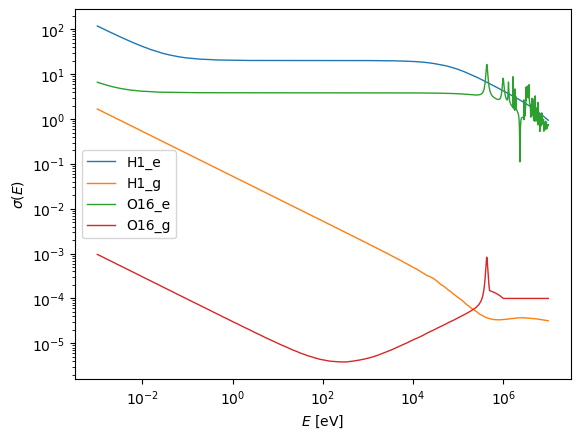

In [2]:
for key in ["H1_e", "H1_g", "O16_e", "O16_g"]:
    plt.loglog(E, cross_section_data[key], lw=1, label=key)
plt.legend()
plt.xlabel("$E$ [eV]"); plt.ylabel("$\sigma(E)$"); plt.legend();

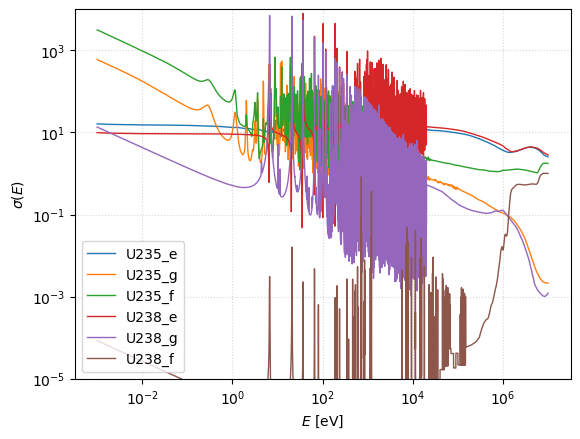

In [3]:
for key in ["U235_e", "U235_g", "U235_f", "U238_e", "U238_g", "U238_f"]:
    plt.loglog(E, cross_section_data[key], lw=1, label=key)
plt.grid(True, ls=":", alpha=0.5)
plt.ylim(1e-5, 1e4)
plt.xlabel("$E$ [eV]"); plt.ylabel("$\sigma(E)$"); plt.legend(loc=3);

**Exercise** Compute the absorption cross section of ${}^{235}$U at 0.01 eV.

In [4]:
cross_section_data["U235_g"][20000]

177.0695587201377

## The Reproduction Factor, $\eta$

Define 
$$
 \eta(E) = \frac{\bar{\nu}(E)\Sigma_f(E)}{\Sigma_a(E)} \, ,
$$
where $\bar{\nu}(E)$ is the expected number of neutrons produced from a fission.

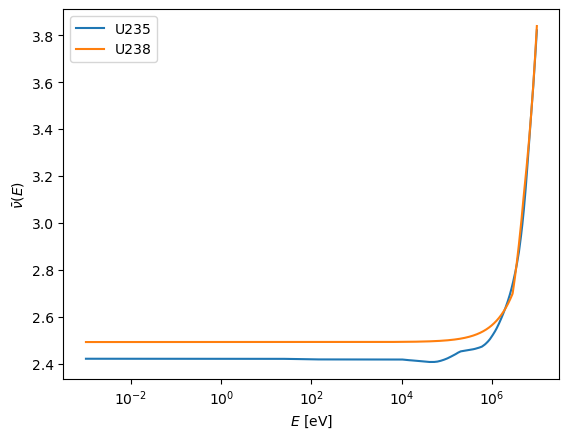

In [5]:
plt.semilogx(E, cross_section_data['U235_nubar'], label="U235")
plt.semilogx(E, cross_section_data['U238_nubar'], label="U238")
plt.xlabel("$E$ [eV]"); plt.ylabel(r"$\bar{\nu}(E)$"); plt.legend();

In [6]:
from scipy.signal import savgol_filter 
smooth = lambda x: savgol_filter(x, 1000, 0)

In [7]:
E, Sigma_S, Sigma_A, nu_Sigma_F = uo2(enrich=0.007)
eta0_7 = nu_Sigma_F / Sigma_A
E, Sigma_S, Sigma_A, nu_Sigma_F = uo2(enrich=0.04)
eta4 = nu_Sigma_F / Sigma_A
E, Sigma_S, Sigma_A, nu_Sigma_F = uo2(enrich=0.20)
eta20 = nu_Sigma_F / Sigma_A

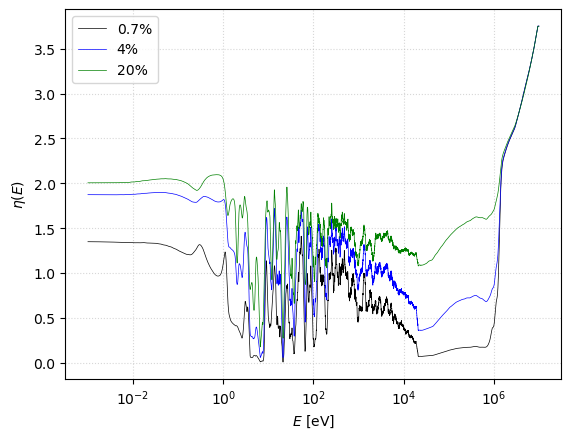

In [8]:
plt.semilogx(E, smooth(eta0_7), linewidth=0.5, color="k", label="0.7%")
plt.semilogx(E, smooth(eta4), linewidth=0.5, color="b",  label="4%")
plt.semilogx(E, smooth(eta20), linewidth=0.5, color="g", label="20%")
plt.grid(True, alpha=0.5, ls=":")
plt.xlabel("$E$ [eV]"); plt.ylabel("$\eta(E)$"); plt.legend();

**Exercise**  The reproduction factor $\eta(E)$ depends *strongly* on $E$.  Compute the expected value of $\eta(E)$ for 4% enrichment if $p(E)$ is uniform (a) for $10^{-3} < E < 10^7$ eV, (b) $10^{-3} < E < 1$ eV, and (c) $0.1 < E < 10$ MeV.

In [13]:
np.trapz(eta4, E) / 1e7

2.815510620547261

In [15]:
np.trapz(eta4[E<=1], E[E<1])

1.820796481149231

In [17]:
np.trapz(eta4[E > 1e5], E[E>1e5])/(1e7-1e5)

2.8384452529968547

## Moderators

**What makes a good moderator?**